## Low rank matrices and the SVD

Experiment with matrices of low rank and computing their SVDs.


In [113]:
import numpy as np

In [122]:
def generate_and_svd_outer_product(rank: int):
    """Generates two random matrices, computes their outer product, and performs SVD."""
    m = 8
    n = 6
    matrix_a = 10*np.random.rand(m, rank)
    matrix_b = 10*np.random.rand(rank, n)
    outer_product_matrix = matrix_a @ matrix_b
    U, s, Vt = np.linalg.svd(outer_product_matrix)

    print("\nA (original matrix):")
    print(np.round(outer_product_matrix, 2))

    print("\nU (left singular vectors):")
    print(np.round(U[:,0:rank], 2))

    print("\ns (singular values):")
    print(np.round(np.diag(s), 2))

    print("\nV^T (right singular vectors):")
    print(np.round(Vt[0:rank,:], 2))


In [123]:
chosen_rank = 3
generate_and_svd_outer_product(chosen_rank)


A (original matrix):
[[115.24  53.51  62.46  86.51 125.11 101.19]
 [ 26.82  36.6    2.56  32.88  25.72  45.87]
 [122.72  42.39  78.02  76.48 132.94  92.06]
 [ 73.04  32.11  50.55  35.11  74.    57.26]
 [106.17  70.51  56.21  73.79 107.22 108.08]
 [ 50.76  48.74  27.05  29.    44.94  61.63]
 [ 58.8   16.39  15.32  79.29  77.47  52.9 ]
 [ 72.15  66.27   9.99  95.44  80.81 100.3 ]]

U (left singular vectors):
[[-0.47  0.15 -0.1 ]
 [-0.14 -0.36  0.2 ]
 [-0.47  0.49 -0.14]
 [-0.28  0.32  0.18]
 [-0.45 -0.04  0.34]
 [-0.22 -0.12  0.5 ]
 [-0.27 -0.15 -0.72]
 [-0.37 -0.69 -0.09]]

s (singular values):
[[488.94   0.     0.     0.     0.     0.  ]
 [  0.    77.87   0.     0.     0.     0.  ]
 [  0.     0.    53.6    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.  ]]

V^T (right singular vectors):
[[-0.49 -0.27 -0.24 -0.38 -0.52 -0.46]
 [ 0.28 -0.39  0.62 -0.44  0.27 -0.34]
 [ 0.05  0.61  0.2

The method above creates an 8x6 matrix A of given rank (1-6) and displays the 3 matrices of its SVD. U is always 8x8, V^T is always 6x6 and S is always 8x6. To emphasize the loss of extraneous information, we are only displaying the rows and columns of U and V that matter when S contains singular values equal to 0.

## Task:

* Call the above function to build matrices of various ranks and compare their SVD compositions
* For a rank 6 matrix, how many elements are in A? In U, V^T, and the non-zero components of s?
* Rank 3 -- same questions
* Rank 1?
* Write a formula for the number of elements in U,S,V^T given the rank of A is 'r'.


## Visualizing Matrices of Low Rank

We create a random matrix of given rank and plot its values using a color spectrum mapping function. We also plot the singular values in decreasing order.

In [120]:
import matplotlib.pyplot as plt

def generate_and_visualize_low_rank_matrix(rank: int, dimension: int):
    """Generates a random low-rank square matrix, visualizes it, and optionally plots its singular values."""
    matrix_a = np.random.rand(dimension, rank)
    matrix_b = np.random.randint(0,10,[rank, dimension])
    low_rank_matrix = matrix_a @ matrix_b

    plt.figure(figsize=(12, 6))

    print(np.round(low_rank_matrix,2))
    plt.subplot(1, 2, 1)
    plt.imshow(low_rank_matrix, cmap='rainbow')
    plt.title(f'Low-Rank Matrix (Rank = {rank})')
    plt.colorbar()

    # Compute SVD
    U, s, Vt = np.linalg.svd(low_rank_matrix)

    # Plot singular values
    plt.subplot(1, 2, 2)
    plt.plot(s, marker='.', linestyle='-')
    plt.title('Sorted Singular Values')
    plt.xlabel('Index')
    plt.ylabel('Singular Value')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

**Reasoning**:
Call the function with example values for rank and dimension.



[[22.41 22.99 16.55 27.66 23.76 26.54 15.93 25.13 21.66 23.85]
 [21.77 29.79 21.72 32.15 31.4  37.48 27.58 35.67 32.21 32.24]
 [18.79 27.22 18.48 26.95 23.98 33.33 18.03 31.72 28.04 26.77]
 [16.19 20.93 16.24 20.68 19.67 26.33 16.03 25.68 23.85 22.78]
 [14.7  21.98 14.28 26.52 23.61 25.52 19.59 31.27 26.64 21.36]
 [10.9  12.81 10.58 22.06 16.78 21.72 15.06 17.19 16.67 19.11]
 [15.69 26.79 16.8  26.8  23.88 33.06 17.98 35.99 32.83 29.27]
 [17.85 23.57 17.36 18.82 23.08 28.74 15.94 30.46 24.4  24.1 ]
 [18.13 18.6  16.28 20.55 21.44 24.57 16.74 27.22 21.32 22.01]
 [20.06 24.98 19.01 31.49 30.12 37.69 22.99 38.31 27.21 25.49]]


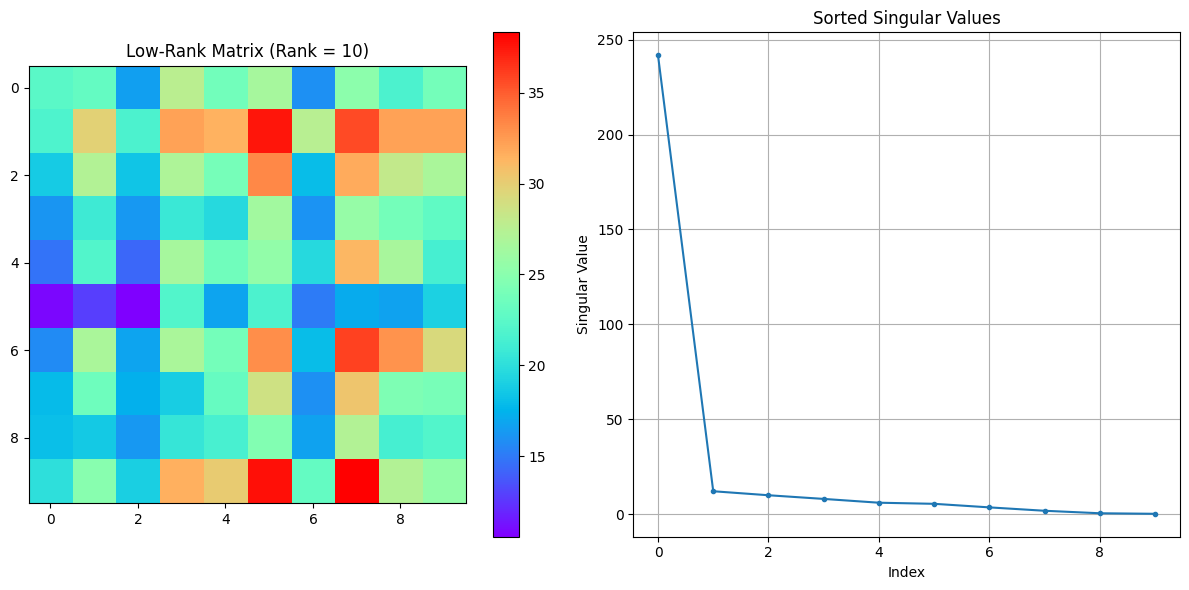

In [121]:
chosen_rank = 10
chosen_dimension = 10
generate_and_visualize_low_rank_matrix(chosen_rank, chosen_dimension)

## Tasks:

* Plot a rank-1 matrix and then a rank-10 matrix. Do this several times and look for trends
* How would you qualitatively compare the 2?
* What about intermediate ranks? 2,3, etc? How would you describe them?
* Try larger matrices and see what happens.